## Purpose:

#### Generate report style infographic --

This notebook is intended to be a 'summary' report guide. It organizes the elements present in preceding notebooks and generates summary maps and text

In [1]:
import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


In [2]:
# delte this is temporary--
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import calculate_histogram_data


from src.utils.universal_functions.setup.generate_base_file import give_primary_frame

from src.utils.functions_for_return_periods.insurance_products_for_RP import insurance_files

#Functions for graphics:
from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import clean_info_dataframe, query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe

from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_table import image_save_returnperiodtable
from src.utils.functions_for_graphics.individual_graphics.image_annual_returnperiod_lineplot import plot_histogram_with_lineplot_4
from src.utils.functions_for_graphics.individual_graphics.image_annual_summary_table import plot_and_colorize_annual_table
from src.utils.functions_for_graphics.individual_graphics.image_map_for_Ei import image_save_map_E_i

#Mapping structure:
from src.utils.functions_for_graphics.layout_formats.event_cat_rp import map_event_cat_rp
from src.utils.functions_for_graphics.layout_formats.summary_of_top_years import map_top_years
#from src.utils.functions_for_graphics.layout_formats.Layout_single_method_option1 import mapped_option1


#functions for all methods
from src.utils.universal_functions.FAO_table_formatting.generate_output_tables import generate_and_give_info_dataframe



The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index
The curren

In [3]:
data = give_primary_frame('Fatalities_fao_pgm', 'cm_properties', 1988, 2021)

100%|██████████| 40.0M/40.0M [00:02<00:00, 19.9MB/s]


Queryset Fatalities_fao_pgm read successfully 
Queryset cm_properties read successfully 


/Users/gbenz/miniforge3/envs/viewser/lib/python3.11/site-packages/ingester3/scratch.py:31: UserWarning: No database connection! Will try to use cache for read-only ops as much as I can
  warnings.warn("No database connection! Will try to use cache for read-only ops as much as I can")


['month_id', 'pg_id', 'country_name', 'C_start_year', 'C_end_year', 'pop_gpw_sum', 'ged_sb', 'ged_ns', 'ged_os', 'year', 'fatalities_sum', 'country_id']


In [4]:
data_working_copy = data

### Provides the primary dataframes defined by the FAO request for information

#### Country Year 

In [24]:
value_field = 'fatalities_sum' # or fatalities_sum

### Select from:

#### 'standard' or 'aggregation' or 'smoothing'

In [25]:
method = 'standard' # 'standard' or 'aggregation' or 'smoothing'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'smoothing':
    value_field = 'perca_Mean'

print(value_field)

fatalities_sum


### Select from:

#### 'Event year' or 'Country year'

In [26]:
return_period = 'Country year' # 'Event year' or 'Country year'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if return_period == 'Event year':
    insurance_attribute = 'return period' # This should eventually be changed and cleaned up
if return_period == 'Country year':
    insurance_attribute = 'Return Period' # This should eventually be changed and cleaned up

In [47]:
country = 'Ethiopia'

### Select from:

#### integer value 2-10

A value error will be raised to prompt a new input if the selection does match specifications required for the intended method

In [40]:
aggregation = '3'

#No need to change -- elements are dependant on the input above:
#-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
if method == 'aggregation' and int(aggregation) <= 1:
    raise ValueError("Aggregation value must be greater than 1 for the 'aggregation' method.")

if method == 'standard' or method == 'smoothing':
    aggregation = '1'
print(aggregation)

1


In [41]:
sort_annual_report_by = 'first_value' 

if method == 'smoothing':
    sort_annual_report_by = 'first_value' # 'first_value' or 'average_value' /// or year but this is not built in yet

print(sort_annual_report_by)

first_value


In [48]:

conflict_profile, x, y, z = insurance_files(data_working_copy, country, method, return_period, aggregation_unit=aggregation, eval_field=value_field)

print(x.head(10))
print('y dataframe')
print(y)
print('z dataframe:')
print(z)

max_year = max(x['year'])
min_year = min(x['year'])

print(max_year)
print(min_year)


   c_id country_name  C_start_year  C_end_year       0
0    57     Ethiopia          1993        2050  123469
1   191     Ethiopia          1946        1993   22112
the length of country_ids for the selected country is: 2
printing he country and year dictionary:
{57: (1993, 2050), 191: (1946, 1993)}
Index where fatalities_sum equals 1: 96: 1.0
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Ethiopia/Standard/Country Year/FAO tables' already exists.
saving annual_summary table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Ethiopia/Standard/Country Year/FAO tables/Ethiopia annual summary.csv
saving insurance table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Ethiopia/Standard/Country Year/FAO tables/Ethiopia insurance table.csv
saving main dataframe table to: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/Country_Results/Ethiopia/Standard/Country Year/FAO tables/Ethiopia main data

In [49]:
info_df, color_scheme = generate_and_give_info_dataframe(z, return_period, value_field, insurance_attribute)
print(info_df)

   Return Period          Range    Color               Label
0              0        0 - 0.0  #d5dbdb  Below 1 in 10 year
1             10      0.0 - 0.0  #377eb8        1 in 10 year
2             20      0.0 - 8.0  #e6ab02        1 in 20 year
3             50     8.0 - 31.0  #762a83        1 in 50 year
4            100  31.0 - 100000  #b2182b       1 in 100 year


#### Provide examples of when to drop and when not to drop RP values:

Do not drop when the maximum value of RP 0 is not zero:
   Return Period          Range    Color               Label
0              0        0 - 8.1  #d5dbdb  Below 1 in 10 year
1             10     8.1 - 21.3  #377eb8        1 in 10 year
2             20    21.3 - 41.5  #e6ab02        1 in 20 year
3             50    41.5 - 54.4  #762a83        1 in 50 year
4            100  54.4 - 100000  #b2182b       1 in 100 year

In [50]:
#define the return period that should be dropped (if any) DEFUALT: 0

#--------------------------------------------------------------------------------
#     This is what should be changed     
#--------------------------------------------------------------------------------
rp_to_drop=[0,10]
#--------------------------------------------------------------------------------
cleaned_labels, cleaned_thresholds, filtered_info = clean_info_dataframe(info_df,rp_to_drop)


print('Reference the Info Dataframe:')
print(filtered_info)
print()
print(f'Here are the labels to be referenced: {cleaned_labels}')
print(f'Here are the corresponding thresholds to be referenced: {cleaned_thresholds}')

Reference the Info Dataframe:
   Return Period          Range    Color          Label
2             20      0.0 - 8.0  #e6ab02   1 in 20 year
3             50     8.0 - 31.0  #762a83   1 in 50 year
4            100  31.0 - 100000  #b2182b  1 in 100 year

Here are the labels to be referenced: ['1 in 20 year', '1 in 50 year', '1 in 100 year']
Here are the corresponding thresholds to be referenced: [8.0, 31.0]


Here changes are being made locally to the function: lineplot_frominfo

#### Produces Graphics and saves to folder which can be referenced by next coding steps:

## NOTE:
y_rows --> is the number of rows in 'y'. this is a dataframe that contains 1 row for each year.

need to make a change so that 

indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()

is referencing the original index from the input specified years.


#### Preceding cells -- UP TO and INCLUDING the cell producing filtered_info, cleaned_labels, and cleaned_thresholds are universal:

This means, regardless which graphic function is selected, the preceding steps are required!

The formatting of notebook cells, departing from this alert message, follow a two cell structure. The first, is a collection of functions or processess
that are applied to a combination of either the tables derived from `insurance_files` function or feature engineering completed by `generate_and_give_info_dataframe`
or `clean_info_dataframe`. No other data will be sourced beyond this point. The investigative nature of this notebook and hosted functions is working exclusively
with "insurance files".

The second cell is a mapping function.

Future development will construct the "precondition cell" to a function built into the desired mapping function. This present status features transparency.

## map_event_cat_rp:

#### Preconditions for setting up the mapping function `map_event_cat_rp`
Gives Top 3 years and 3 select decadal years

  percentile  fatalities_sum  occurrence return period payout rate
0         90             0.0           0          10.0         30%
1         95             0.0       10017          20.0         55%
2         96             1.0         214          25.0   undefined
3         98             8.0         108          50.0         75%
4         99            31.0         105         100.0        100%
5        max          2012.0           1            --          --
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table' already exists.


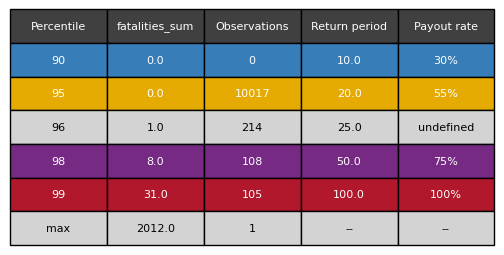

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/1x1/table_png' already exists.


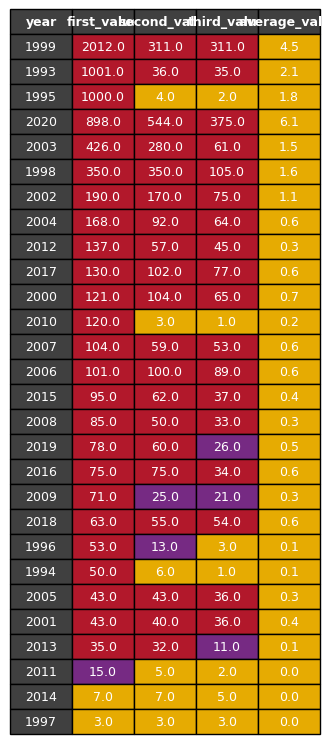

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/plot_png' already exists.


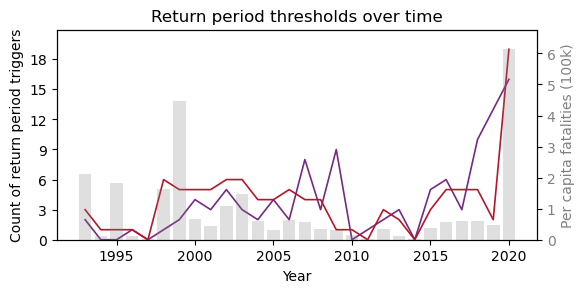

map for: 0


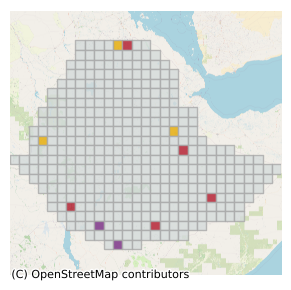

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 0 in 1999.0  with dimensions 3.50x3.50.png
map for: 1


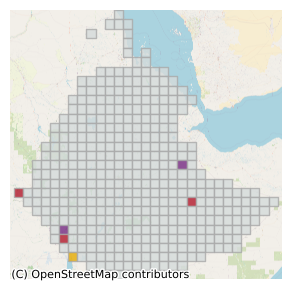

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 1 in 1993.0  with dimensions 3.50x3.50.png
map for: 2


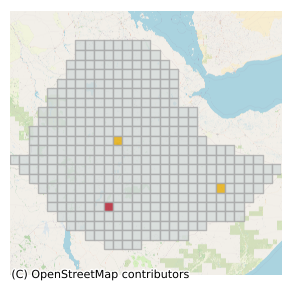

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 2 in 1995.0  with dimensions 3.50x3.50.png
map for: 3


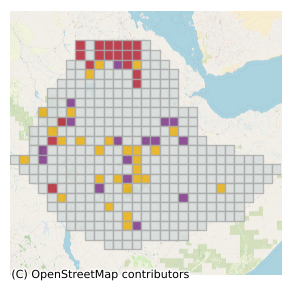

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 3 in 2020.0  with dimensions 3.50x3.50.png
map for: 4


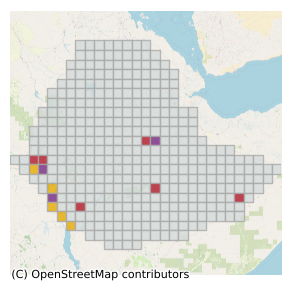

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 4 in 2003.0  with dimensions 3.50x3.50.png
map for: 3


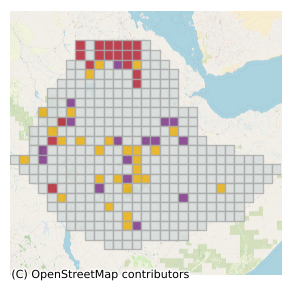

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 3 in 2020.0  with dimensions 3.50x3.50.png
map for: 10


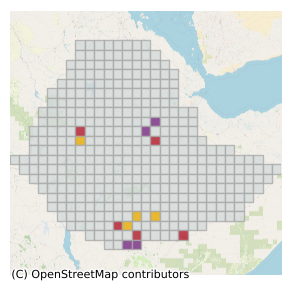

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 10 in 2000.0  with dimensions 3.50x3.50.png
map for: 11


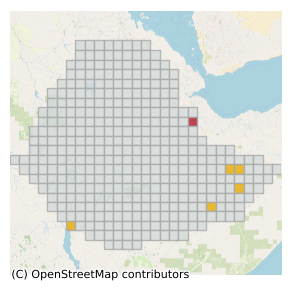

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 11 in 2010.0  with dimensions 3.50x3.50.png


In [51]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y, field_to_sort=sort_annual_report_by, number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
plot_and_colorize_annual_table(sorted_annual_table, filtered_info, country, method, return_period, aggregation=aggregation, figure_height=5.5, figure_width=4.0)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)


gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(5, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)

evaluate_specific_years = [2000, 2010, 2020]
indices = sorted_annual_table.index[sorted_annual_table['year'].isin(evaluate_specific_years)].tolist()


for specific_year in indices:
        print(f'map for: {specific_year}')
        year_to_eval = define_year_to_map(sorted_annual_table, specific_year)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=specific_year)

        

### map_event_cat_rp:

Gives Top 3 years and 3 select decadal years

In [52]:
map_event_cat_rp(country, method, return_period, min_year, max_year, aggregation)

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/1x1/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/event_cat_rd' already exists.
located map rank1: Ethiopia conflict year 0 in 1999.0  with dimensions 3.50x3.50.png
1999
located map rank 2: Ethiopia conflict year 1 in 1993.0  with dimensions 3.50x3.50.png
1993
located map rank 3: Ethiopia conflict year 2 in 2004.0  with dimensions 3.50x3.50.png
2004
Ethiopia conflict year 19 in 2010.0  with dimensions 3.50x3.50.png
Ethiopia conflict year 4 in 2020.0  with dimensions 3.50x3.50.png
Ethiopia conflict year 10 in 2000.

## map_top_years:

#### Preconditions for setting up the mapping function `map_event_cat_rp`
Gives Top 10 years of conflict

In [ ]:
summary_text = 'summary text'

In [ ]:
# Define your variables
import pandas as pd
country  # Example value, replace with actual country

max_year = max(y['year'])
min_year = min(y['year'])
print(f'The max year in the dataframe (max_year): {max_year}')
print(f'The min year in the dataframe (max_year): {min_year}')

year_range = f"{min_year}-{max_year}"  # Example value, replace with actual year range
#total_conflict = sum(subset_to_country['fatalities_sum'])  

total_events = len(x)
pg_events = len(pd.unique(x['pg_id']))
total_years = len(pd.unique(x['year']))

#method = "Smoothing"  # Example value, replace with actual method used
#return_period_definition = "Cell-year"  # Example value, replace with actual definition

year_of_greatest_conflict = sorted_annual_table['year'].iloc[0]

row_with_50 = z.loc[z['Return Period'] == 50.0]
row_with_100 = z.loc[z['Return Period'] == 100.0]
row_with_max = z.loc[z['Return Period'] == 'Max']

#greatest_conflict_range = "2010-2020"  # Example value, replace with actual range
payout_rate_value50 = row_with_50[value_field].values[0]
payout_rate_value100 = row_with_100[value_field].values[0]

Occurrence_value50 = row_with_50['Occurrence'].values[0]
Occurrence_value100 = row_with_100['Occurrence'].values[0]
Occurrence_valueMax = row_with_max['Occurrence'].values[0]

total_occurence_over100year = Occurrence_value100 + Occurrence_valueMax

ged_sb_sum = conflict_profile['ged_sb']
ged_ns_sum = conflict_profile['ged_ns']
ged_os_sum = conflict_profile['ged_os']
fatalities_sum = conflict_profile['fatalities_sum']

summary_text = (
    f"During the observed period, a total of {total_events} PRIO-Grid years were analyzed in {country}, spanning from {year_range}. "
    f"Throughout this time range, the conflict profile consists of {ged_os_sum} fatalities from one-sided events, {ged_sb_sum} state-based, and {ged_ns_sum} non-state, producing a total of {fatalities_sum} events."
    f"The analysis employed the {method} method for evaluation. "
    f"The definition of return period applied is {return_period}. "
    f"The year with the highest average conflict was {year_of_greatest_conflict}."
    f"The thresholds for 1 in 50 and 1 in 100 year events were {payout_rate_value50} and {payout_rate_value100}, respectively. "
    f"Occurrences of 1 in 50 year events totaled {Occurrence_value50}, while there were {total_occurence_over100year} occurrences of 1 in 100 year events. "
)

In [ ]:
map_top_years(country, method, return_period, summary_text, aggregation)

## map_top_years:

#### Preconditions for setting up the mapping function `map_event_cat_rp`
Gives Top 10 years of conflict


Unlike preceding options, this function is still in development therefore still hosted locally in the notebook and not saved as .py file.

In [53]:
#image_save_ind_annual_rp_contextvalues

from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists

#import: query_and_sort_annual_table from universal folder / FAO / generate output tables
from src.utils.universal_functions.setup.build_directory import float_to_custom_string, ensure_directory_exists


#from src.utils.functions_for_graphics.individual_graphics.map_helper.manipulate_tables_for_mapping import query_and_sort_annual_table, provide_values_at_input_return_periods, retrieve_geodataframe, define_year_to_map, query_geodataframe
from src.utils.functions_for_graphics.layout_formats.rgb import rgb_to_hex

import os
import pandas as pd
import matplotlib.pyplot as plt
import sys

def image_save_ind_annual_rp_contextvalues(input_table, colors, column_to_apply_symbology, country, year, method, returnperiodmethod, aggregation='1', figure_height=5.0, figure_width=2.5): #input_table = Jerry_table

    #Feedback on Sept 05 was to make column names lower case. The column_to_apply_symbology must now also be lowercase:
    #column_to_apply_symbology = column_to_apply_symbology.lower()

    if column_to_apply_symbology == 'Return Period':
        column_to_apply_symbology = 'Return period'
    
    if column_to_apply_symbology == 'return period':
        column_to_apply_symbology = 'Return period'

    figure_height_str = float_to_custom_string(figure_height)
    figure_width_str = float_to_custom_string(figure_width)

    aggregation_string = str(aggregation) + 'x' + str(aggregation)


    base_directory = os.getcwd()
    if aggregation == '1':
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'table_png/percentile and payout table/'
    else:
        output_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'

    ensure_directory_exists(output_path)

    columns_to_remove = ['pg_id','year', 'Label']
    columns_to_convert_int= ['Fatalities', 'Population', 'Return period']
    columns_to_rename = {
    'percapita_100k': 'Per capita',
    'perca_Mean': 'Fatalities P.C',
    'percentile': 'Percentile',
    'return period': 'Return period',
    'Return Period': 'Return period',
    'payout rate': 'Payout rate',
    'occurrence': 'Observations',
    'observations': 'Observations',
    'payout': 'Payout',
    'closest r.p.': 'Closest R.P.',
    'pop_gpw_sum': 'Population',
    'fatalities_sum': 'Fatalities',

    # Add more column mappings as needed
    }

    df = input_table.rename(columns={col: new_col for col, new_col in columns_to_rename.items() if col in input_table.columns})
    df[columns_to_convert_int] = df[columns_to_convert_int].apply(lambda x: x.astype(int))
    df = df.drop(columns=df.columns.intersection(columns_to_remove))

    light_grey = rgb_to_hex((211, 211, 211))  # Light grey color
    dark_grey = rgb_to_hex((64, 64, 64))  # Dark grey color

    # Plot the table
    fig, ax = plt.subplots(figsize=(figure_width, figure_height))  # Size in inches (width, height)
    ax.axis('tight')
    ax.axis('off')

    # Create the table
    table = ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')

    # Adjust table properties
    table.auto_set_font_size(False)  # Disable automatic font size
    table.set_fontsize(8)  # Set font size

    # Calculate cell widths and heights to fit the figure size exactly
    n_rows, n_cols = df.shape
    cell_width = figure_width / n_cols
    cell_height = figure_height / (n_rows + 1)  # +1 for the header row

    # Set the size of each cell
    for i in range(n_rows + 1):
        for j in range(n_cols):
            table[(i, j)].set_width(cell_width)
            table[(i, j)].set_height(cell_height)
            table[(i, j)].set_fontsize(21)  # Set the font size for each cell


    for j in range(n_cols):
        table[(0, j)].set_facecolor(dark_grey)
        table[(0, j)].set_text_props(color='white')

    # Apply colors to the cells based on the 'percentile' column
    percentile_col_idx = df.columns.get_loc(column_to_apply_symbology)
    for i in range(1, n_rows + 1):  # Skip header row
        percentile_value = df.iloc[i - 1, percentile_col_idx]
        if percentile_value in colors:
            color = colors[percentile_value]
        else:
            color = light_grey
        for j in range(n_cols):
            table[(i, j)].set_facecolor(color)
            table[(i, j)].set_text_props(color='white' if color != light_grey else 'black')


    output_file = output_path + 'individual_annual_context' + country +f'_{year}_' + 'with_dimensions_' + figure_width_str + 'x' + figure_height_str + '.png'
    # Save the table as PNG with exact size and no white space
    plt.savefig(output_file, dpi=300, bbox_inches='tight', pad_inches=0, transparent=True)

    # Show the table plot
    plt.show()


In [56]:
#function for mapping 

import pandas as pd
import os
from PIL import Image, ImageDraw, ImageFont
import re

import os
import sys

# Get the current working directory
current_directory = os.getcwd()

# Print the current working directory
print("The current Working Directory is:", current_directory)

# Get the path to the base directory (VIEWS_FAO_index)
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
print(f'The base directory will be set to: {base_dir}')

# Add the base directory to sys.path
sys.path.insert(0, base_dir)

from src.utils.universal_functions.setup.build_directory import ensure_directory_exists

def find_file_with_string(folder_path, search_string):
    # Loop through all files in the directory
    for filename in os.listdir(folder_path):
        # Check if the search_string is in the filename
        if search_string in filename:
            return filename
    return None


"""
This gives the formatting criteria for OPTION 2 Slides (1 & 2)
"""

def map_event_cat_rp_with_an_summary_tables(country, method, returnperiodmethod, year_datastart, year_dataend, aggregation='0', gridlines='no'): 

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/event_cat_rd_template.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)

        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---

    output_path = base_directory + '/files/Layouts/event_cat_rd/' 

    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')

    year__0 = re.search(r"\b\d{4}\b", map_filename_0)

    # Convert the match to an integer and print
    if year__0:
        year__0 = str(int(year__0.group()))
        print(year__0)

    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')

    year__1 = re.search(r"\b\d{4}\b", map_filename_1)

    # Convert the match to an integer and print
    if year__1:
        year__1 = str(int(year__1.group()))
        print(year__1)

    map_filename_2 = find_file_with_string(map_path, 'conflict year 2 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 3: {map_filename_2}')

    year__2 = re.search(r"\b\d{4}\b", map_filename_2)

    # Convert the match to an integer and print
    if year__2:
        year__2 = str(int(year__2.group()))
        print(year__2)

    

    #Map 3
    map_filename_2000 = find_file_with_string(return_period_table_path, year__0) # looking for a 3.5 x 3.5 map
    print(map_filename_2000)    
    #Map 4
    map_filename_2010 = find_file_with_string(return_period_table_path, year__1) # looking for a 3.5 x 3.5 map
    print(map_filename_2010)
    #Map 5
    map_filename_2020 = find_file_with_string(return_period_table_path, year__2) # looking for a 3.5 x 3.5 map
    print(map_filename_2020)





    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (745, 110), 'size': (265, 275), 'label': '','filename': map_filename_0, 'folder': map_path, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1025, 110), 'size': (265, 275), 'label': '','filename': map_filename_1, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1
        {'position': (1305, 110), 'size': (275, 275), 'label': '','filename': map_filename_2, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1

#These are the selected conflict years
        {'position': (745, 450), 'size': (265, 375), 'label': '','filename': map_filename_2000, 'folder': return_period_table_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1025, 450), 'size': (265, 375), 'label': '','filename': map_filename_2010, 'folder': return_period_table_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1305, 450), 'size': (265, 375), 'label': '','filename': map_filename_2020, 'folder': return_period_table_path, 'font_size':9, 'line_width': 3},       # Year 1


        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'Return period labels and threshold values','font_size': 18, 'background_color': 'darkgrey', 'line_width': 2, 'text_color': 'white'},     # Payout Legend Title

        {'position': (800, 385), 'size': (150, 35), 'label': year__0,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top year
        {'position': (1085, 385), 'size': (150, 35), 'label': year__1,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 2 year
        {'position': (1355, 385), 'size': (150, 35), 'label': year__2,'font_size': 24, 'background_color': None, 'line_width': 0, 'text_color': 'black'},     # Year Label for Top 3 year
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary
        background_color = title_b['background_color']  # Get the font size from the dictionary
        line_width = title_b['line_width']
        text_color = title_b['text_color']
            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill= background_color, outline="black", width=line_width)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill=text_color, font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
    if returnperiodmethod == 'Event year':
        return_period_definition = 'bigp'
    else:
        return_period_definition = 'littlep'


    output_filename = os.path.join(output_path, f'event_cat_rp_{country}_{aggregation_string}_{return_period_definition}_{year_datastart}_{year_dataend}.png')
    output_filename = output_filename.replace(' ', '_')

    print()
    print('file saved to:')
    print(output_filename)
    template_image.save(output_filename)
    template_image.show()


def map_event_cat_rp_2x2(country, method, returnperiodmethod, aggregation='0', gridlines='no'): 

    """ 
    This was built as a secondary option to map_event_cat_rp. If deployed, user should first consult the map_event_cat_rp code to keep references consistent.

    """

    base_directory = os.getcwd()
    font_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/OpenSans-VariableFont.ttf'
    template_path = base_dir + '/src/utils/functions_for_graphics/layout_formats/PRIO Layout Method 3_1.png'
    template_image = Image.open(template_path)


    if aggregation == '1':
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + aggregation_string + '/table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 

    else:
        aggregation_string = aggregation + 'x' + aggregation

        map_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string   + '/' + 'map_png/'
        print(map_path)
        annual_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/'
        print(annual_table_path)
        return_period_table_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'table_png/percentile and payout table/'
        print(return_period_table_path)
        return_period_lineplot_path = base_directory + '/files/' + country + '/' + method + '/' + returnperiodmethod + '/' + aggregation_string  + '/' + 'plot_png/'
        print(return_period_lineplot_path)
        #---
        output_path = base_directory + '/files/Layouts/' + country + '/' 


    ensure_directory_exists(output_path)

    #look for the graphic with the appropriate dimensions:
    #Map 1
    map_filename_0 = find_file_with_string(map_path, 'conflict year 0') # looking for a 3.5 x 3.5 map 
    print(f'located map rank1: {map_filename_0}')
    #Map 2
    map_filename_1 = find_file_with_string(map_path, 'conflict year 1 ') # looking for a 3.5 x 3.5 map
    print(f'located map rank 2: {map_filename_1}')
    #Map 3
    map_filename_2010 = find_file_with_string(map_path, '2010') # looking for a 3.5 x 3.5 map
    print(map_filename_2010)
    #Map 4
    map_filename_2020 = find_file_with_string(map_path, '2020') # looking for a 3.5 x 3.5 map
    print(map_filename_2020)
    #Map 5
    #Map 6


    annual_table_filename = find_file_with_string(annual_table_path, '4.0x5.5') #  looking for a 2.5 x 1.75 map 4_0x5_5
    print(f'located lineplot file in folder: {annual_table_filename}')

    return_period_table_fileneame = find_file_with_string(return_period_table_path, '2.5x1.8')
    print(f'located lineplot file in folder: {return_period_table_fileneame}')
    
    return_period_lineplot_fileneame = find_file_with_string(return_period_lineplot_path, '6.0x3.0')
    print(f'located lineplot file in folder: {return_period_lineplot_fileneame}')



    # Load the template image
    #template_path = 'Slide 1 Option B Template.png'

    template_image = template_image.resize((1620, 915), Image.Resampling.LANCZOS)
    draw = ImageDraw.Draw(template_image)



    # Define grid parameters
    grid_spacing = 50  # Adjust the spacing as needed
    grid_color = "blue"
    grid_width = 1

    # Define the font for the grid labels
    font = ImageFont.load_default()

    # Get the dimensions of the template image
    width, height = template_image.size

    if gridlines == 'yes':
    # Draw the grid
        for x in range(0, width, grid_spacing):
            draw.line([(x, 0), (x, height)], fill=grid_color, width=grid_width)
            draw.text((x, 0), str(x), fill=grid_color, font=font)
        for y in range(0, height, grid_spacing):
            draw.line([(0, y), (width, y)], fill=grid_color, width=grid_width)
            draw.text((0, y), str(y), fill=grid_color, font=font)

    # Define the positions and sizes for placeholders
    positions = [

#These are the top 2 Conflict years
        {'position': (765, 110), 'size': (325, 325), 'label': '','filename': map_filename_0, 'folder': map_path, 'font_size': 9, 'line_width': 3},       # Year 1
        {'position': (1215, 110), 'size': (325, 325), 'label': '','filename': map_filename_1, 'folder': map_path, 'font_size':9,'line_width': 3},       # Year 1
        
#These are the selected conflict years
        {'position': (765, 505), 'size': (325, 325), 'label': '','filename': map_filename_2010, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1
        {'position': (1215, 505), 'size': (325, 325), 'label': '','filename': map_filename_2020, 'folder': map_path, 'font_size':9, 'line_width': 3},       # Year 1

        {'position': (50, 225), 'size': (550, 275), 'label': '','filename': return_period_table_fileneame, 'folder': return_period_table_path,'font_size':1, 'line_width': 3},     # Payout Legend 
       
        #{'position': (375, 500), 'size': (250, 375), 'label': '','filename': annual_table_filename, 'folder': annual_table_path,'font_size':1},     # Payout Legend 
        {'position': (50, 550), 'size': (550, 300), 'label': '','filename': return_period_lineplot_fileneame, 'folder': return_period_lineplot_path,'font_size':1, 'line_width': 0},     # Payout Legend 

        #{'position': (425, 575), 'size': (400, 50), 'label': 'Legend'},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Legend'},     # Payout Legend Title

    ]

        # Define the positions and sizes for text boxes
    text_boxes = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        #{'position': (65, 215), 'size': (270, 325), 'label':  summary_text,'font_size': 15}
    ]

    title = [
        #{'position': (425, 575), 'size': (400, 50), 'label': 'Payout Legend','font_size': 24},     # Payout Legend Title
        #{'position': (925, 100), 'size': (650, 50), 'label': 'Top Conflict Years','font_size': 32},     # Payout Legend Title
        {'position': (50, 25), 'size': (600, 125), 'label':  country, 'font_size': 92}
    ]

    title_boxes = [
        {'position': (50, 175), 'size': (550, 35), 'label': 'Payout Legend','font_size': 18},     # Payout Legend Title
        #{'position': (750, 25), 'size': (800, 35), 'label': 'Top Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (750, 450), 'size': (800, 35), 'label': 'Selected Conflict Years','font_size': 24},     # Payout Legend Title
        #{'position': (50, 200), 'size': (300, 350), 'label': '','font_size': 32},     # empty text box

        #{'position': (50, 175), 'size': (300, 500), 'label':  summary_text,'font_size': 14}
    ]

        # # Load and paste the images onto the template
    for pos in positions:
        if 'folder' in pos and 'filename' in pos:
                img_path = os.path.join(pos['folder'], pos['filename'])
                if os.path.exists(img_path):
                    img = Image.open(img_path)
                    img = img.resize(pos['size'], Image.Resampling.LANCZOS)
                    template_image.paste(img, pos['position'])
                else:
                    print(f"Image {pos['filename']} not found in {pos['folder']}")
        else:
                print(f"Missing 'folder' or 'filename' in: {pos}")

# Add text boxes
    # Add text boxes
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    for title_b in title_boxes:
        x, y = title_b['position']
        w, h = title_b['size']
        label = title_b['label']
        font_size = title_b['font_size']  # Get the font size from the dictionary

            # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    #     Draw a rectangle around the text box area with a dark grey background
        draw.rectangle([x, y, x + w, y + h], fill="darkgrey", outline="black", width=2)

    #     # Calculate the bounding box of the text
        text_bbox = draw.textbbox((0, 0), label, font=font)
        text_width = text_bbox[2] - text_bbox[0]
        text_height = text_bbox[3] - text_bbox[1]

         # Calculate the position to center the text
        text_x = x + (w - text_width) / 2
        text_y = y + (h - text_height) / 3

    #     # Draw the text centered in the box with white color
        draw.text((text_x, text_y), label, fill="white", font=font)
#-------------------------------------------------------------------------------------------------------------------------------------------------------
#-------------------------------------------------------------------------------------------------------------------------------------------------------
    for t in title:
        x, y = t['position']
        w, h = t['size']
        label = t['label']
        font_size = t['font_size']  # Get the font size from the dictionary

        # Create a font object with the specified size
        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

        # Draw a rectangle around the text box area with a dark grey background
        #draw.rectangle([x, y, x + w, y + h], fill="grey", outline="white", width=2)
        #draw.rectangle([x, y, x + w, y + h])

        # Wrap the text to fit inside the box
        wrapped_text = []
        words = label.split()
        line = ""

        for word in words:
            # Add the word to the line and check if it fits
            test_line = line + word + " "
            text_bbox = draw.textbbox((0, 0), test_line, font=font)
            test_width = text_bbox[2] - text_bbox[0]

            if test_width <= w:
                line = test_line
            else:
                # If the line is too long, add the current line to wrapped_text and start a new line
                wrapped_text.append(line.strip())
                line = word + " "

        # Add the last line
        wrapped_text.append(line.strip())

        # Draw the text line by line, adjusting the position
        current_y = y
        for line in wrapped_text:
            draw.text((x, current_y), line, fill="black", font=font)
            current_y += font_size  # Move to the next line

        # Ensure that the text doesn't overflow the box height
        if current_y > y + h:
            print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         
    # for box in text_boxes:
    #     x, y = box['position']
    #     w, h = box['size']
    #     label = box['label']
    #     font_size = box['font_size']  # Get the font size from the dictionary

    #     # Create a font object with the specified size
    #     try:
    #         font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
    #     except IOError:
    #         font = ImageFont.load_default()

    #     # Draw a rectangle around the text box area with a dark grey background
    #     #draw.rectangle([x, y, x + w, y + h], fill="white", outline="white", width=2)
    #     #draw.rectangle([x, y, x + w, y + h])

    #     # Wrap the text to fit inside the box
    #     wrapped_text = []
    #     words = label.split()
    #     line = ""

    #     for word in words:
    #         # Add the word to the line and check if it fits
    #         test_line = line + word + " "
    #         text_bbox = draw.textbbox((0, 0), test_line, font=font)
    #         test_width = text_bbox[2] - text_bbox[0]

    #         if test_width <= w:
    #             line = test_line
    #         else:
    #             # If the line is too long, add the current line to wrapped_text and start a new line
    #             wrapped_text.append(line.strip())
    #             line = word + " "

    #     # Add the last line
    #     wrapped_text.append(line.strip())

    #     # Draw the text line by line, adjusting the position
    #     current_y = y
    #     for line in wrapped_text:
    #         draw.text((x, current_y), line, fill="black", font=font)
    #         current_y += font_size  # Move to the next line

    #     # Ensure that the text doesn't overflow the box height
    #     if current_y > y + h:
    #         print("Warning: Text overflow in the box. Consider reducing the font size or the amount of text.")

#-------------------------------------------------------------------------------------------------------------------------------------------------------         
#-------------------------------------------------------------------------------------------------------------------------------------------------------         

    #Draw rectangles at specified positions
    for pos in positions:
        x, y = pos['position']
        w, h = pos['size']
        line_width = pos['line_width']  # Get the line width from the dictionary
        draw.rectangle([x, y, x + w, y + h], outline="black", width=line_width)
        draw.text((x, y - 20), pos['label'], fill="black")
        font_size = pos['font_size']  # Get the font size from the dictionary

        try:
            font = ImageFont.truetype(font_path, font_size)  # Use a valid font on your system
        except IOError:
            font = ImageFont.load_default()

    # Save and show the template with marked positions
    #marked_template_path = '/Users/gbenz/Desktop/tmp.png'
            
        # Save the final image with a specified filename
            

    output_filename = os.path.join(output_path, f'{country}_{method}_{returnperiodmethod}_{aggregation}x{aggregation}.png')
    template_image.save(output_filename)
    template_image.show()


The current Working Directory is: /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods
The base directory will be set to: /Users/gbenz/Documents/VIEWS_FAO_index


  percentile  fatalities_sum  occurrence return period payout rate
0         90             0.0           0          10.0         30%
1         95             0.0       10017          20.0         55%
2         96             1.0         214          25.0   undefined
3         98             8.0         108          50.0         75%
4         99            31.0         105         100.0        100%
5        max          2012.0           1            --          --
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table' already exists.


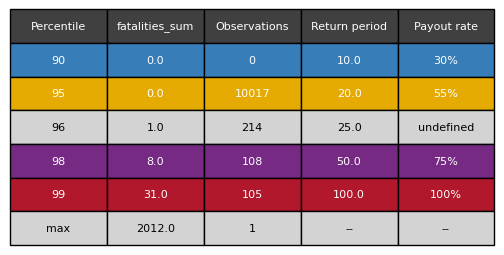

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/plot_png' already exists.


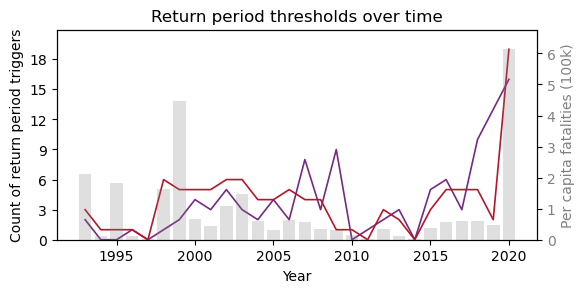

map for: 0


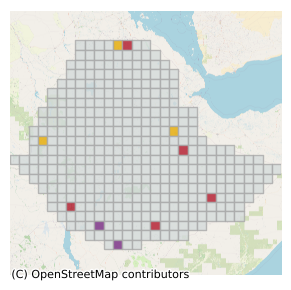

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 0 in 1999.0  with dimensions 3.50x3.50.png
map for: 1


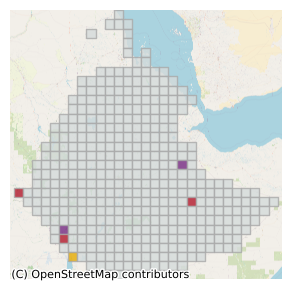

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 1 in 1993.0  with dimensions 3.50x3.50.png
map for: 2


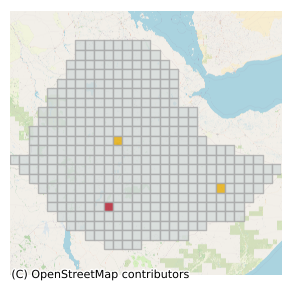

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 2 in 1995.0  with dimensions 3.50x3.50.png
map for: 3


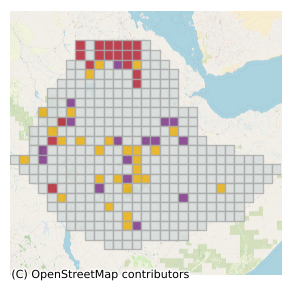

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 3 in 2020.0  with dimensions 3.50x3.50.png
map for: 4


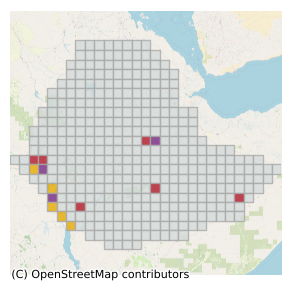

Map saved to /Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/Ethiopia conflict year 4 in 2003.0  with dimensions 3.50x3.50.png
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table' already exists.


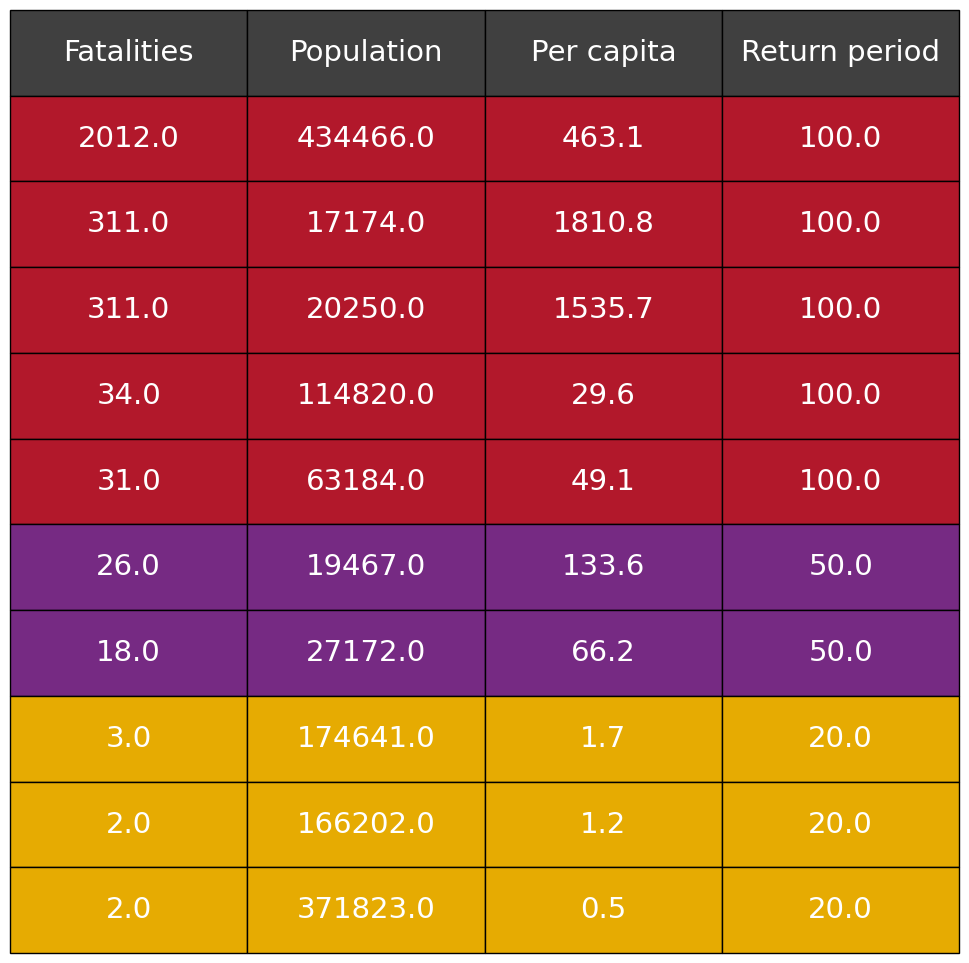

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table' already exists.


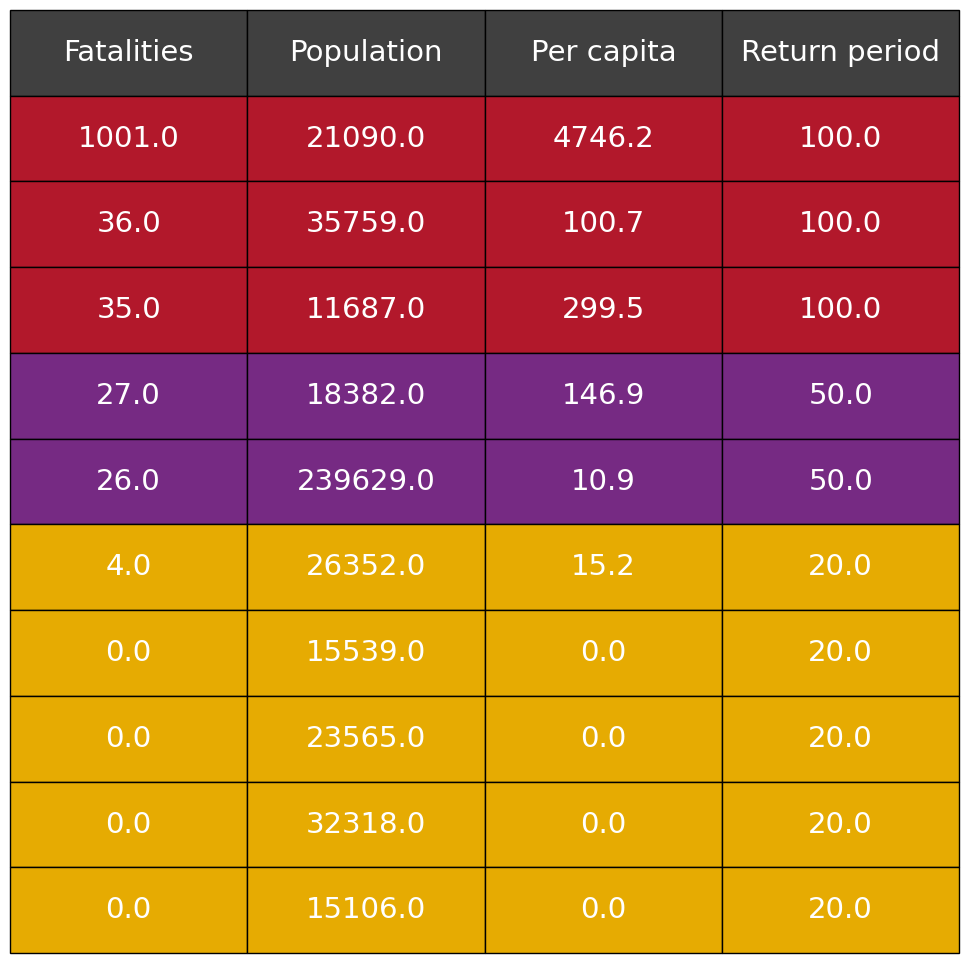

Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table' already exists.


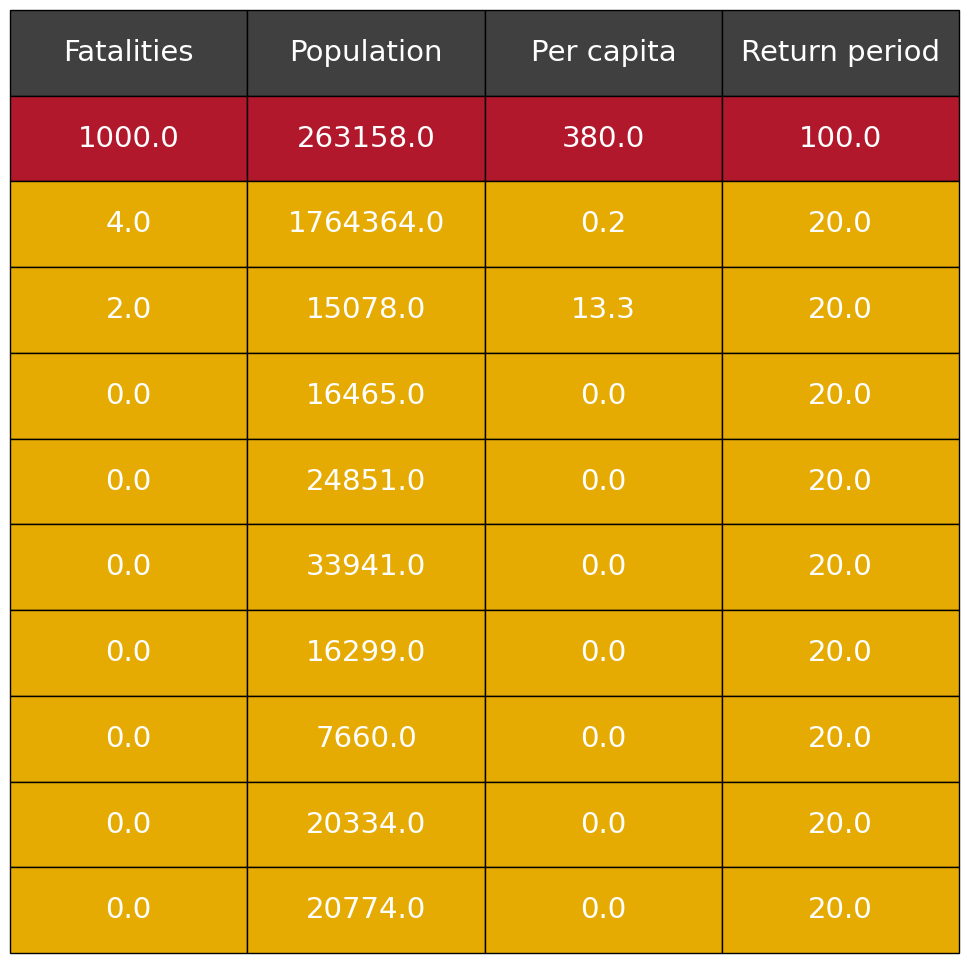

In [61]:
#produces graphics, tables, and maps for the CELL TYPE RETURN PERIOD:
y_rows = y.shape[0]
#make the insurance table columns lowercase to keep in line with JPR standards:
z.columns = z.columns.str.lower()
print(z)
#-----This is setting up things to export a map---------------------------------------------------------------
sorted_annual_table = query_and_sort_annual_table(y, field_to_sort=sort_annual_report_by, number_of_rows=y_rows)
sorted_annual_table.iloc[:, 1:] = sorted_annual_table.iloc[:, 1:].round(1)
sorted_annual_table = sorted_annual_table.reset_index(drop=True)

filtered_colors = filtered_info['Color'].tolist()
lineplot_colors = filtered_colors[1:]
image_save_returnperiodtable(z, color_scheme, insurance_attribute, country, method, return_period, aggregation=aggregation, figure_height=1.75, figure_width=2.5,) #input_table = Jerry_table
    #image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info_upto30, country, 'Aggregation', 'Cell', year_to_eval, '3', figure_height=3.5, figure_width=3.5)
plot_histogram_with_lineplot_4(x, filtered_info, country, method, return_period, aggregation=aggregation, value_field=value_field, labels_to_omit='Below 1 in 10 year', figure_height=3.0, figure_width=6.0)
#--------------------------------------------------------------------------------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------
#Do this for the historic -- Or draw on already processed data
gdf = retrieve_geodataframe(aggregation)
for annual_event in range(min(5, y_rows)):
        print(f'map for: {annual_event}')
        year_to_eval = define_year_to_map(sorted_annual_table, annual_event)
        gdf_merged = query_geodataframe(gdf, x, year_to_eval, field=value_field)
        image_save_map_E_i(gdf_merged, cleaned_thresholds, cleaned_labels, filtered_info, country, method, return_period, year_to_eval, aggregation, field=value_field, country_label='no', figure_height=3.5, figure_width=3.5, year_id=annual_event)

#--------------------------------------------------------------------------------------------------------------------------
# Generate specific annual tables----------------------------------------------------
#--------------------------------------------------------------------------------------------------------------------------

# Step 1: Split the 'Range' column into two columns (min and max)
filtered_info[['Range_min', 'Range_max']] = filtered_info['Range'].str.split(' - ', expand=True)
filtered_info['Range_min'] = filtered_info['Range_min'].astype(float)
filtered_info['Range_max'] = filtered_info['Range_max'].astype(float)

# Step 2: Create a function to map per capita values to the appropriate 'Return Period' and 'Label'
def map_return_period(per_capita_value):
    for _, row in filtered_info.iterrows():
        if row['Range_min'] <= per_capita_value < row['Range_max']:
            return pd.Series([row['Return Period'], row['Label']])
    return pd.Series([None, None])

# Step 3: Apply the function to the per_capita_df and assign the new 'Return Period' and 'Label' columns
x_with_rp = x
x_with_rp[['Return Period', 'Label']] = x_with_rp[value_field].apply(map_return_period)

year_list = sorted_annual_table['year'].head(3).tolist()
for year in year_list:
    sorted_df = x_with_rp.sort_values(by=['year', 'Return Period', value_field], ascending=[True, False, False])
    subset_df = sorted_df[sorted_df['year'] == year].head(10)
    image_save_ind_annual_rp_contextvalues(subset_df, color_scheme, 'Return Period', country, year, method, return_period, aggregation='1', figure_height=3.5, figure_width=3.5) #input_table = Jerry_table


In [63]:
map_event_cat_rp_with_an_summary_tables(country, method, return_period, min_year, max_year, aggregation, gridlines='no')

/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/map_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/1x1/table_png/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/table_png/percentile and payout table/
/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Ethiopia/standard/Country year/plot_png/
Directory '/Users/gbenz/Documents/VIEWS_FAO_index/notebooks/methods/files/Layouts/event_cat_rd' already exists.
located map rank1: Ethiopia conflict year 0 in 1999.0  with dimensions 3.50x3.50.png
1999
located map rank 2: Ethiopia conflict year 1 in 1993.0  with dimensions 3.50x3.50.png
1993
located map rank 3: Ethiopia conflict year 2 in 1995.0  with dimensions 3.50x3.50.png
1995
individual_annual_contextEthiopia_1999_with_dimensions_3.5x3.5.png
individual_annual_contextEthiopia_1993_with_dimensions_3.5x3.5.png
individual_annual_contextEthiopia

Malawi

no per capita fatalities appear because there are only 2 maybe 3 event which puts any occurence above the 99.9% threshold. because the insurance table rounds o the .1 deceimal -- no fatalities are reports anywhere in the country because there are so few.